# Классификация объектов в множестве

### Постановка задачи

> Необходимо решить задачу классификации с помощью методов:
> *    Метода k ближайших соседей
> *    Метода опорных векторов 
> *    Наивного Байесовского классификатора 


### Сгенерируем и визиализируем исходные данные

(100, 2)


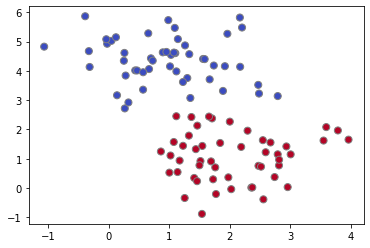

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0,cluster_std=0.8)
print(X.shape)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor="gray",s=50,cmap='coolwarm')

### Решим задачу с помощью встроенных функций в библиотеку SkLearn

In [2]:
from sklearn.neighbors import KNeighborsClassifier

def Generation(n):
    ind=np.random.randint(0.,100.,n)
    test_x=X[ind]
    test_y=y[ind]
    return test_x,test_y

def classify(n):
    model_Classify=KNeighborsClassifier(n_neighbors=n)
    model_Classify.fit(X,y)
    return model_Classify.predict(test_x)

test_x,test_y=Generation(20)

c2=classify(2)
c5=classify(5)
c10=classify(10)

print('sklearn :')
print('2 соседа:',c2)
print('5 соседей:',c5)
print('10 соседей:',c10)

sklearn :
2 соседа: [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]
5 соседей: [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]
10 соседей: [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]


### Построим матрицу несоответствий и проверим качество модели

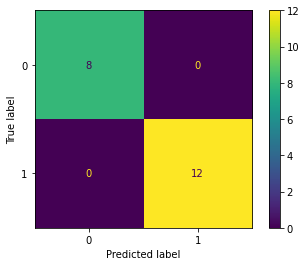

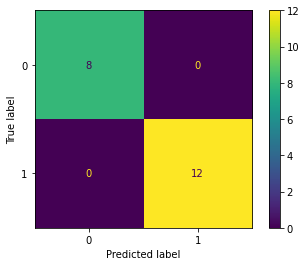

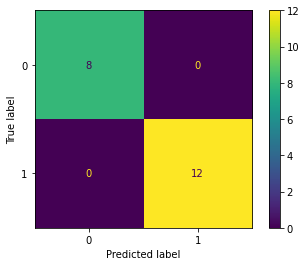

Точность
2  -  1.0
5  -  1.0
10  -  1.0

Полнота
2  -  1.0
5  -  1.0
10  -  1.0

Особенность:
2  -  1.0
5  -  1.0
10  -  1.0

ROC:
2  -  1.0
5  -  1.0
10  -  1.0


In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, accuracy_score, roc_auc_score, multilabel_confusion_matrix

cm=confusion_matrix(test_y, c2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

cm=confusion_matrix(test_y, c5)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

cm=confusion_matrix(test_y, c10)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('Точность')
print('2  - ', accuracy_score(test_y, c2));
print('5  - ', accuracy_score(test_y, c5));
print('10  - ', accuracy_score(test_y, c10));
print()

print('Полнота')
print('2  - ', recall_score(test_y, c2));
print('5  - ', recall_score(test_y, c5));
print('10  - ', recall_score(test_y, c10));
print()

print('Особенность:')
print('2  - ', recall_score(test_y, c2, pos_label=0));
print('5  - ', recall_score(test_y, c5, pos_label=0));
print('10  - ', recall_score(test_y, c10, pos_label=0));
print()

print('ROC:')
print('2  - ', roc_auc_score(test_y, c2));
print('5  - ', roc_auc_score(test_y, c5));
print('10  - ', roc_auc_score(test_y, c10));

### Обучим модель по методу SVM (Метод опорный векторов) и сравним результаты

In [4]:
from sklearn.svm import SVC

model_SVC=SVC(kernel='linear')
model_SVC.fit(X,y)
result_SVC=model_SVC.predict(test_x)

print('Соседей -', c10);
print('SVN     -', result_SVC);

Соседей - [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]
SVN     - [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]


### Визуализируем границы принятия решений и опорных векторов

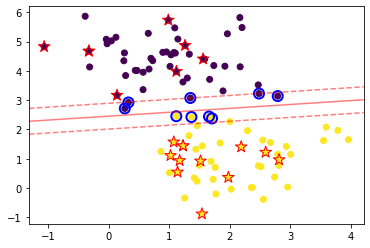

In [5]:
ax = plt.subplots()[1]
scatter = ax.scatter(X[:,0], X[:,1], c = y)
scatter1 = ax.scatter(test_x[:,0], test_x[:,1], c=c2, marker='*', edgecolors='r', s=150)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1],100)
yy = np.linspace(ylim[0], ylim[1],100)
Yy, Xx = np.meshgrid(yy, xx)
xy = np.vstack([Xx.ravel(), Yy.ravel()]).T

P = model_SVC.decision_function(xy).reshape(Xx.shape)
ax.contour(Xx, Yy, P, colors = 'r', levels = [-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(model_SVC.support_vectors_[:, 0], model_SVC.support_vectors_[:, 1], s=100, linewidth=2, edgecolors="blue", facecolor='none')
plt.show()

### Построим модель наивного байесовского классификатора и сравним результаты

In [6]:
from sklearn.naive_bayes import GaussianNB

model_GNB=GaussianNB()
model_GNB.fit(X,y)
result_GNB=model_GNB.predict(test_x)

print('Результаты:')
print('Соседей     -', c10);
print('SVN         -', result_SVC);
print('GaussianNB  -', result_GNB)

Результаты:
Соседей     - [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]
SVN         - [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]
GaussianNB  - [0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0]


Методы показывают одинаковый результат

### Построим матрицу несоответствий и проверим качество получившихся моделей

Метод соседей:


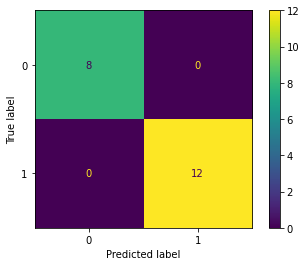

SVC:


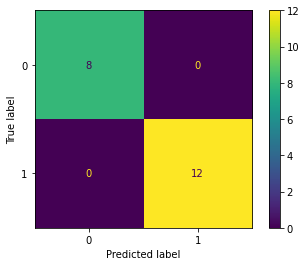

Метод байесовского классификатора:


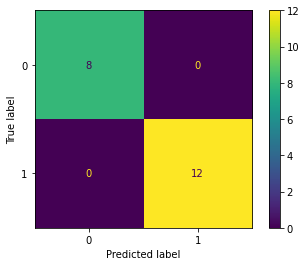

In [7]:
print('Метод соседей:')
cm=confusion_matrix(test_y, c2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('SVC:')
cm=confusion_matrix(test_y, result_SVC)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print('Метод байесовского классификатора:')
cm=confusion_matrix(test_y, result_GNB)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()